# Orbital Velocity vs Time Curve
Here we try to plot the curve between the orbital velocity and the time from some specifc instant.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

The masses are being taken in solar mass units(represented by ${M}_\odot$) and distances in Astronimcal Units

$$1 {M}_\odot=1.98847\times10^{30}\:Kg$$
$$1 AU = 149597870700\:m$$

In [2]:
m1=float(input("1st mass: ")) #in solar mass units
m2=float(input("2nd mass: ")) #in solar mass units
e=float(input("Eccentricity: "))
a=float(input("Semi major axis of true orbit: ")) #in AU

1st mass: 6
2nd mass: 2
Eccentricity: 0.9
Semi major axis of true orbit: 4


Now we calculate the time period and mean anomaly of the motion:

$$T=\sqrt{\frac{a^3}{m_1 + m_2}}\quad and \quad M=\frac{2\pi t}{T}$$</p>

where $m_1$ and $m_2$ are in ${M}_\odot$ and $a$ is in $AU$

In [3]:
T=np.sqrt(a**3/(m1+m2))
t=np.linspace(0,T,1000) #Specific time instants
M=2*np.pi*t/T

The Kepler equation is-

$$M=E-esinE\quad$$

where $E$ is the Eccentric Anomaly of the orbit and for the orbital velocities we have

$$v_1=\sqrt{\frac{Gm_2^2}{a(m_1+m_2)} \left(\frac{2}{1-ecosE}-1\right)}$$
$$v_2=\sqrt{\frac{Gm_1^2}{a(m_1+m_2)} \left(\frac{2}{1-ecosE}-1\right)}$$

It's difficult to obtain $E$ in closed form from this equation so we apply Newton-Raphson method to determine $E$ for a given $t$

Using the Newton-Raphson process:

$$E = \frac{{M} - e(E \cos E - \sin E)}{1- e \cos E}$$

which converges quickly for an initial guess of $E=\pi$

In [4]:
E=np.pi #Initial guess
for i in range(0,5):
    E=(M-e*(E*np.cos(E)-np.sin(E)))/(1-e*np.cos(E))
fact=(2/(1-e*np.cos(E)))-1
v1=np.sqrt((8.8681e8*m2*m2*fact)/(a*(m1+m2)))/1000
v2=np.sqrt((8.8681e8*m1*m1*fact)/(a*(m1+m2)))/1000

And now we plot the velocity against time

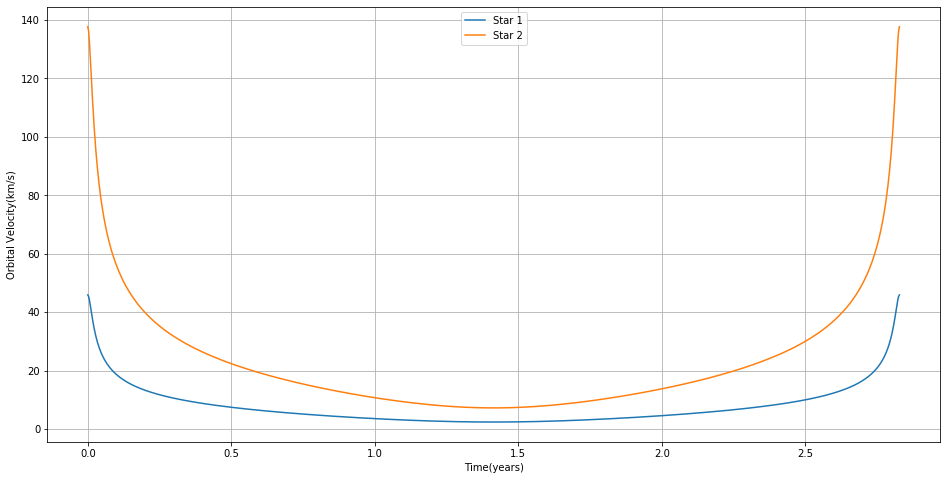

In [5]:
plt.figure(figsize=(16,8))
plt.plot(t,v1,label='Star 1')
plt.plot(t,v2,label='Star 2')
plt.xlabel('Time(years)')
plt.ylabel('Orbital Velocity(km/s)')
plt.legend(loc='upper center')
plt.grid()
plt.show()